Цель: изучить применение дерева решений в рамках задачи регрессии
Описание задания:
В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений.

Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
Проведите первичный анализ.
a.Проверьте данные на пропуски. Удалите в случае обнаружения.
b.*Нормализуйте один из признаков.

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [46]:
df = sklearn.datasets.fetch_california_housing(as_frame=True).frame
df.info()

res = {}
res['Выборки'] = ('train', 'test')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [47]:
# Пропусков нет
df.isna().mean()*100


MedInc         0.0
HouseAge       0.0
AveRooms       0.0
AveBedrms      0.0
Population     0.0
AveOccup       0.0
Latitude       0.0
Longitude      0.0
MedHouseVal    0.0
dtype: float64

In [48]:
# нормализация одного из признаков
df_ = df.copy()
col_n = df['Population']
df_['Population'] = (col_n - col_n.min())/ (col_n.max() - col_n.min())

In [49]:
df_.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,0.008941,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,0.067210,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,0.013818,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,0.015555,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,0.015752,2.181467,37.85,-122.25,3.422


Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

In [50]:
X = df.drop('MedHouseVal', axis= 1)
y = pd.Series(df['MedHouseVal'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучите модель регрессии на обучающем множестве.

Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.

In [51]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
 

LinearRegression()

In [52]:
res['LinearRegression'] = [model_lr.score(X_train, y_train), model_lr.score(X_test,y_test)]

In [53]:
#y_pred_train = model.predict(X_train)
y_pred_test = model_lr.predict(X_test)
 
res

{'Выборки': ('train', 'test'),
 'LinearRegression': [0.6125511913966952, 0.575787706032451]}

Обучите дерево решений на обучающем множестве.
a. Повторите п. 5 для полученной модели.
b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.

In [54]:
model_dt = DecisionTreeRegressor(max_depth=3,random_state=42).fit(X_train, y_train)


In [55]:
res['DecisionTreeRegressor'] = [model_dt.score(X_train, y_train), model_dt.score(X_test,y_test)]

In [56]:
res_ = pd.DataFrame(res)
res_

,Выборки,LinearRegression,DecisionTreeRegressor
0,train,0.612551,0.537898
1,test,0.575788,0.509763


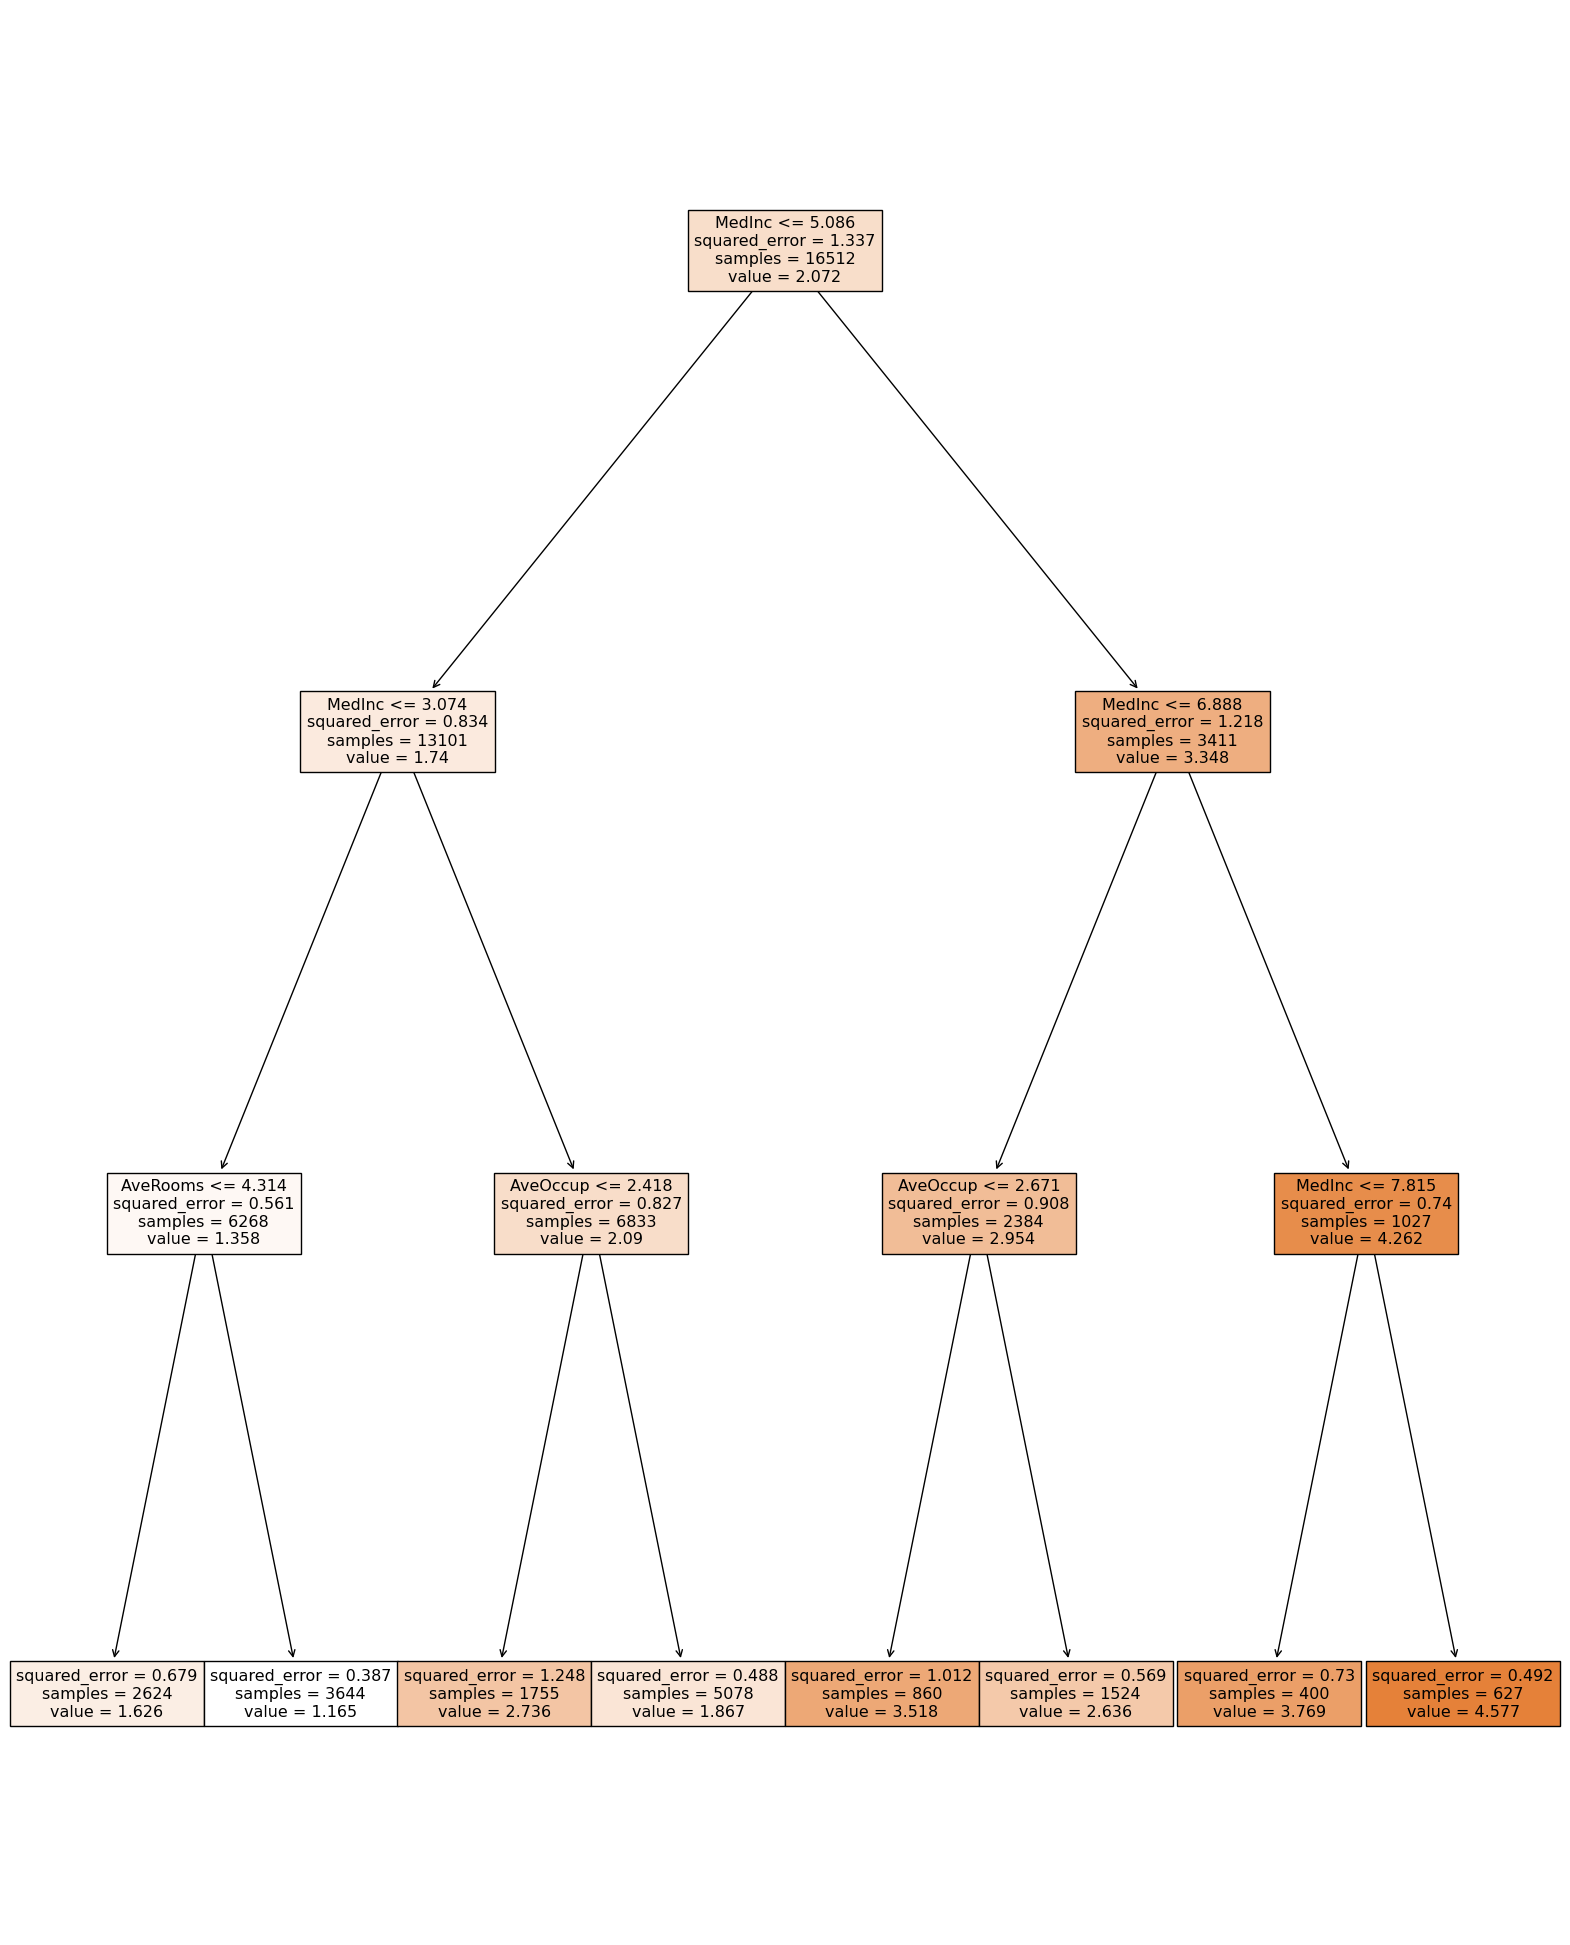

In [57]:
fig = plt.figure(figsize=(20,25))
_ = tree.plot_tree(model_dt, feature_names=df.drop('MedHouseVal', axis= 1).columns, filled=True)

Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.
a. Повторите п. 5 для полученной модели.

In [60]:
model_dt_2 = DecisionTreeRegressor(max_depth=5,random_state=42).fit(X_train, y_train)

In [61]:
res['DecisionTreeRegressor_2'] = [model_dt_2.score(X_train, y_train), model_dt_2.score(X_test,y_test)]

res_ = pd.DataFrame(res)
res_

,Выборки,LinearRegression,DecisionTreeRegressor,DecisionTreeRegressor_2
0,train,0.612551,0.537898,0.637679
1,test,0.575788,0.509763,0.599732


In [75]:
# отклонение Пуасона вместо squared_error
model_dt_3 = DecisionTreeRegressor(max_depth=5,random_state=42, criterion='poisson').fit(X_train, y_train)


In [76]:

res['DecisionTreeRegressor_3'] = [model_dt_3.score(X_train, y_train), model_dt_3.score(X_test,y_test)]

res_ = pd.DataFrame(res)
res_

,Выборки,LinearRegression,DecisionTreeRegressor,DecisionTreeRegressor_2,DecisionTreeRegressor_3
0,train,0.612551,0.537898,0.637679,0.645631
1,test,0.575788,0.509763,0.599732,0.611889


Путем подстройки параметров Дерево Решений показала лучший результат, но с оптимизацией регрессии мы не работали. 
Линейная Регрессия лучше подходит для задач с выраженной линейной зависимостью данных. 
Дерево решений больше для нелинейных зависимостей